In [ ]:
import rasterio
import rasterio.features
import rasterio.warp

with rasterio.open(r"C:\Users\forc2101\OneDrive - USherbrooke\IFT809\IFT809\py_madaclim\madaclim_current.tif") as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

In [2]:
import rasterio
dataset = rasterio.open(r"C:\Users\forc2101\OneDrive - USherbrooke\IFT809\IFT809\py_madaclim\madaclim_current.tif")
dataset.name


'C:/Users/forc2101/OneDrive - USherbrooke/IFT809/IFT809/py_madaclim/madaclim_current.tif'

In [6]:
print(dataset.count)
print(dataset.width)
print(dataset.height)

70
803
1528


In [8]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}
dataset.bounds

BoundingBox(left=298000.0, bottom=7155000.0, right=1101000.0, top=8683000.0)

In [11]:
dataset.transform *(0,0)

(298000.0, 8683000.0)

In [12]:
dataset.transform * (dataset.width, dataset.height)

(1101000.0, 7155000.0)

In [13]:
dataset.crs

CRS.from_epsg(32738)

In [14]:
dataset.indexes


(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70)

In [16]:
band1 = dataset.read(1)
band1


array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

Values from the array can be addressed by their row, column index.

In [17]:
band1[dataset.height // 2, dataset.width // 2] 


np.int16(120)

Datasets have an index() method for getting the array indices corresponding to points in georeferenced space. To get the value for the pixel 100 kilometers east and 50 kilometers south of the dataset’s upper left corner, do the following.

In [18]:
x, y = (dataset.bounds.left + 100000, dataset.bounds.top - 50000)
row, col = dataset.index(x, y)
print(row, col)

band1[row, col]

50 100


np.int16(-32768)

To get the spatial coordinates of a pixel, use the dataset’s xy() method. The coordinates of the center of the image can be computed like this.

In [19]:
dataset.xy(dataset.height // 2, dataset.width // 2)


(np.float64(699500.0), np.float64(7918500.0))

In [20]:
import numpy as np
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
Z2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2)
Z = 10.0 * (Z2 - Z1)

Creating a new raster file

In [21]:
from rasterio.transform import Affine
res = (x[-1] - x[0]) / 240.0
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)
transform

Affine(np.float64(0.03333333333333333), np.float64(0.0), np.float64(-4.016666666666667),
       np.float64(0.0), np.float64(0.03333333333333333), np.float64(-3.0166666666666666))

In [22]:
new_dataset = rasterio.open(
    '../data/new.tif',
    'w',
    driver='GTiff',
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
    crs='+proj=latlong',
    transform=transform,
)

In [23]:
new_dataset.write(Z, 1)
new_dataset.close()


In [25]:
with rasterio.open(
    '../data/new.tif',
    'w',
    driver='GTiff',
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
    crs='+proj=latlong',
    transform=transform,
) as dst:
    dst.write(Z, 1)

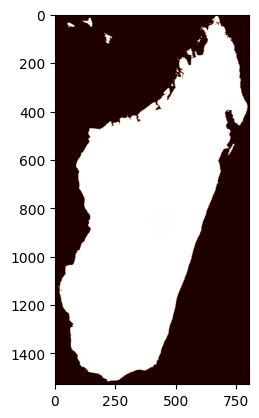

In [1]:
import rasterio
from matplotlib import pyplot
src = rasterio.open(r"C:\Users\forc2101\OneDrive - USherbrooke\IFT809\IFT809\py_madaclim\madaclim_current.tif")
pyplot.imshow(src.read(1), cmap='pink')

pyplot.show()

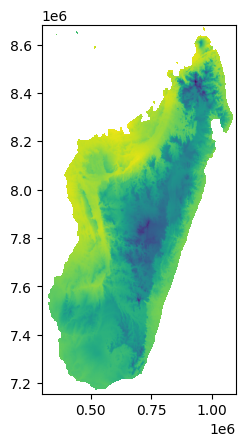

<Axes: >

In [7]:
import rasterio
from matplotlib import pyplot
from rasterio.plot import show

src = rasterio.open(r"C:\Users\forc2101\OneDrive - USherbrooke\IFT809\IFT809\py_madaclim\madaclim_current.tif")

show(src)
#show(src.read(), transform=src.transform)

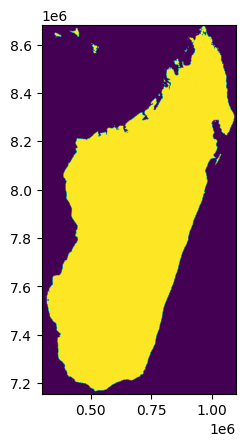

<Axes: >

In [10]:
#show((src, 2), cmap='viridis')
show(src.read(2), transform=src.transform, cmap='viridis')


Rasterio supports three primary methods for transforming of coordinates from image pixel (row, col) to and from geographic/projected (x, y) coordinates. The interface for performing these coordinate transformations is available in rasterio.transforms through one of AffineTransformer, GCPTransformer, or RPCTransformer. The methods xy and rowcol are responsible for converting between (row, col) -> (x, y) and (x, y) -> (row, col), respectively.

AffineTransformer

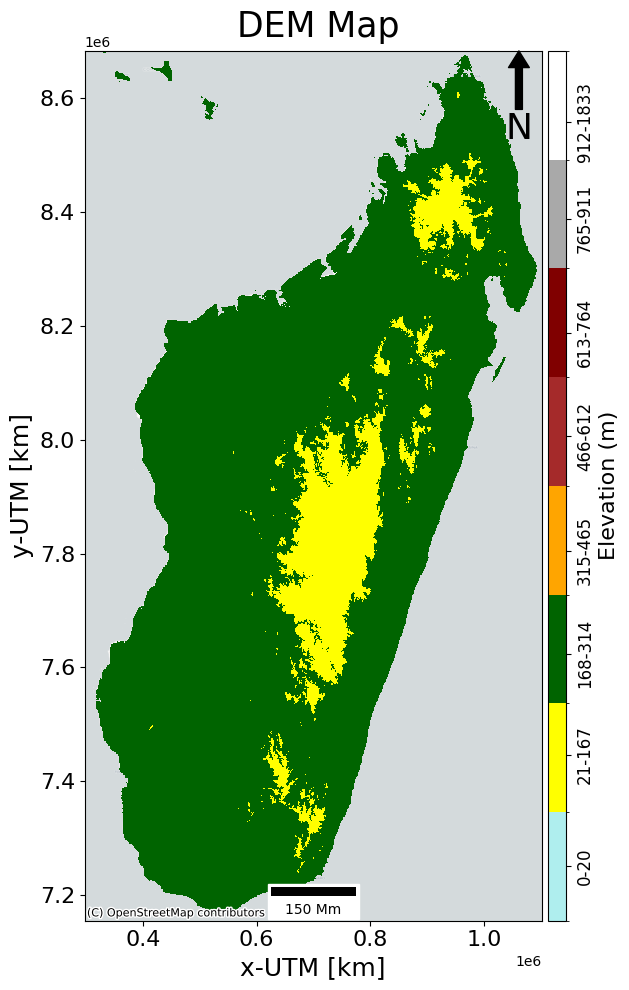

In [25]:

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable
import rasterio.plot
from matplotlib_scalebar.scalebar import ScaleBar

#Import raster file of interest
with rasterio.open(r"C:\Users\forc2101\OneDrive - USherbrooke\IFT809\IFT809\py_madaclim\madaclim_current.tif") as src:
    raster = src.read(2)
#create tick and divide by 1000 to get better representation
def numfmt (x, pos):
    s = f'{x/1000:,.0f}'
    return s
#subplot
fig,ax = plt.subplots(figsize=(10,10))

z_pal2 = [0,20,167,314,465,612,764,911,1833]
pal_rgb2 = ['paleturquoise','yellow', 'darkgreen', 'orange','brown','maroon','darkgrey','white']
cmap2, norm = from_levels_and_colors(z_pal2, pal_rgb2, extend = 'neither')
ax.imshow(raster, cmap = cmap2, norm = norm, extent = rasterio.plot.plotting_extent(src), interpolation = 'none')
ctx.add_basemap(ax, crs = src.crs, source = ctx.providers.CartoDB.Positron, zoom = 8, alpha = 1)
im = ax.imshow(raster, cmap = cmap2, norm = norm, extent = rasterio.plot.plotting_extent(src), interpolation = 'none')
#plot shape file
#shapefile_path = 'yourpath'
#data = gpd.read_file(shapefile_path)
#data.boundary.plot(ax=ax, linewidth = 0.5, edgecolor = 'black')

#Add the north arrow
x, y, arrow_length = 0.95, 1, 0.09
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=26,
            xycoords=ax.transAxes)
scalebar = ScaleBar(1, units='km', location='lower center')
ax.add_artist(scalebar)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.xlabel('x-UTM [km]', fontsize = 18) # check fontstyle
plt.ylabel('y-UTM [km]', fontsize = 18) # check fontstyle
plt.title(" DEM Map", fontsize = 25, pad = 10)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "4%", pad = 0.06)
cbar = plt.colorbar(im, cax = cax, aspect = 10)
cbar.set_ticks([10,97,234,375,532,674,831,1233])
cbar.set_ticklabels(['0-20','21-167','168-314','315-465','466-612','613-764','765-911','912-1833'], rotation = 90, verticalalignment = 'center', fontsize = 12)
cbar.set_label(label = 'Elevation (m)', size=16)
plt.tight_layout()
plt.show()

GCPTransformer

In [18]:
!pip install matplotlib_scalebar

RPCTransformer

In [32]:
import rasterio

import numpy as np

# Open our raster dataset
dataset = rasterio.open(r"C:\Users\forc2101\OneDrive - USherbrooke\IFT809\IFT809\py_madaclim\madaclim_current.tif")

image = dataset.read()

In [52]:
image.shape

(70, 1528, 803)

In [33]:
# How many bands does this image have?
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj)

Number of bands in image: 70

Image size is: 1528 rows x 803 columns

Raster driver: GTiff

Image projection:
EPSG:32738


In [34]:
red_band = image[2, :, :] # this pulls out the 3rd band
print(red_band.shape)

(1528, 803)


In [35]:
red_band_read = dataset.read(3) # this pulls out the 3rd band
print(red_band_read.shape)

if np.array_equal(red_band_read, red_band): # are they equal?
    print('They are the same.')

(1528, 803)
They are the same.


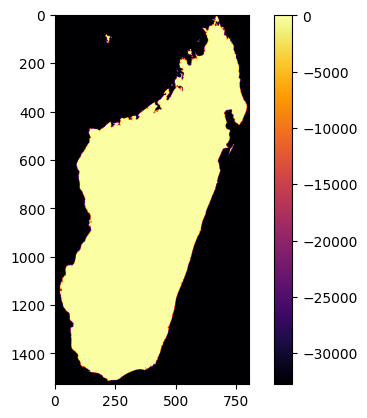

In [36]:
import matplotlib.pyplot as plt
import rasterio

import numpy as np

# Open our raster dataset
dataset = rasterio.open(r"C:\Users\forc2101\OneDrive - USherbrooke\IFT809\IFT809\py_madaclim\madaclim_enviro.tif")

image = dataset.read()
fig, ax = plt.subplots()
img = ax.imshow(image[1, :, :], cmap="inferno")
fig.colorbar(img, ax=ax) 

#show(dataset)

#show(dataset, 12)

""" ax.imshow(dataset.read(10))"""

plt.show() 

c:\Users\forc2101\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


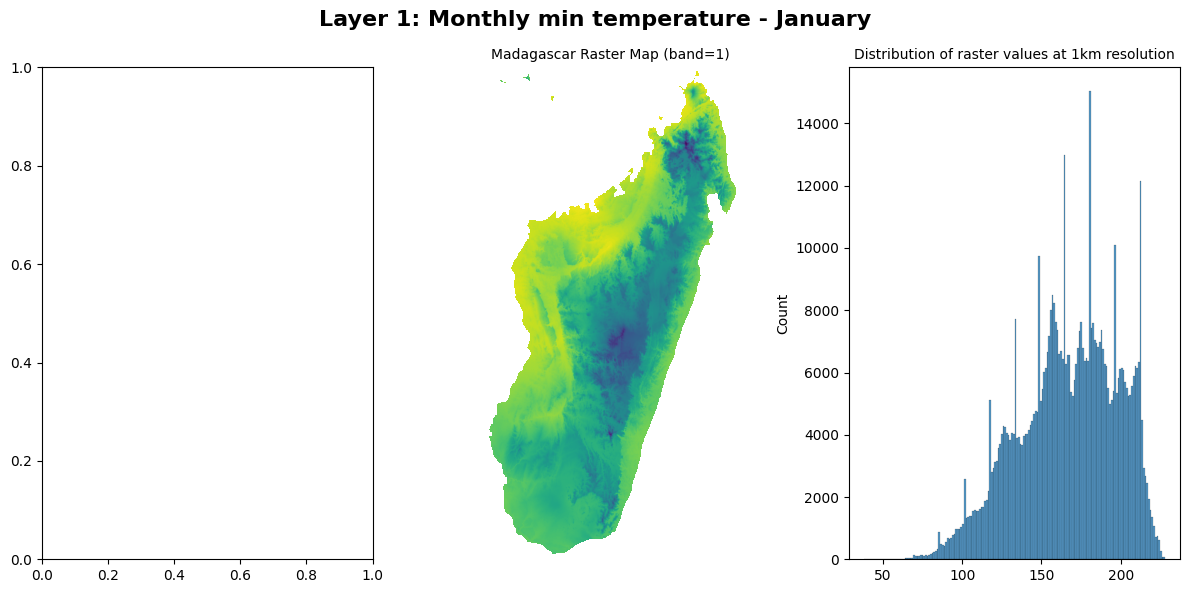

In [4]:
import csv
import pathlib
import inspect
from pathlib import Path
from typing import Optional, Union, List, Optional, Tuple, Dict
import time
from tqdm import tqdm
import re
import warnings

import py_madaclim
from py_madaclim._constants import Constants
from py_madaclim.info import MadaclimLayers

import rasterio
import rasterio.errors
import rasterio.plot
import pyproj
from pyproj import Transformer
import shapely
from shapely.geometry import Point
import geopandas as gpd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable

#import matplotlib.pyplot as plt
#import rasterio

#import numpy as np


# Open our raster dataset
raster = rasterio.open(r"C:\Users\forc2101\OneDrive - USherbrooke\IFT809\IFT809\py_madaclim\madaclim_current.tif")
band_num = 1
band_data = raster.read(band_num, masked=True)


# Continous data for multi plots
subplots_figsize = (12, 6)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=subplots_figsize)

# Calculate extent of raster
left, bottom, right, top = raster.bounds

rasterio.plot.show(band_data.squeeze(), ax=axes[1], cmap="viridis", extent=[left, right, bottom, top])    # Use rasterio.plot.show() instead                
im = axes[1].get_images()[0]  # get the first image
                
# Colorbar customization
divider = make_axes_locatable(axes[1])

axes[1].set_title(f"Madagascar Raster Map (band={band_num})", fontsize=10)
axes[1].set_yticks([])
axes[1].set_xticks([])
axes[1].axis("off")

points = [(48.380066,-19.189873), (44.272222,-22.853611), (46.145833,-24.303611)]

# Convert points to GeoDataFrame
#gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([p[0] for p in points], [p[1] for p in points]))
gdf = gpd.GeoDataFrame(geometry=[Point(p) for p in points], crs='EPSG:4326')
gdf = gdf.to_crs(raster.crs)
# Plot the points on the raster
#gdf.plot(ax=axes[1], color='red', markersize=15)                
                
# Plot histogram of raster vals
sns.histplot(
                    data=band_data.compressed(),
                    ax=axes[2]
                    
                )
#axes[2].lines[0].set_color("black")
axes[2].set_title("Distribution of raster values at 1km resolution", fontsize=10)
#axes[2].set_xlabel(layer_units)

fig.suptitle(
                f"Layer {band_num}: {"Monthly min temperature - January"}",
                fontsize=16,
                weight="bold",
                ha="center"
            )

fig.tight_layout()



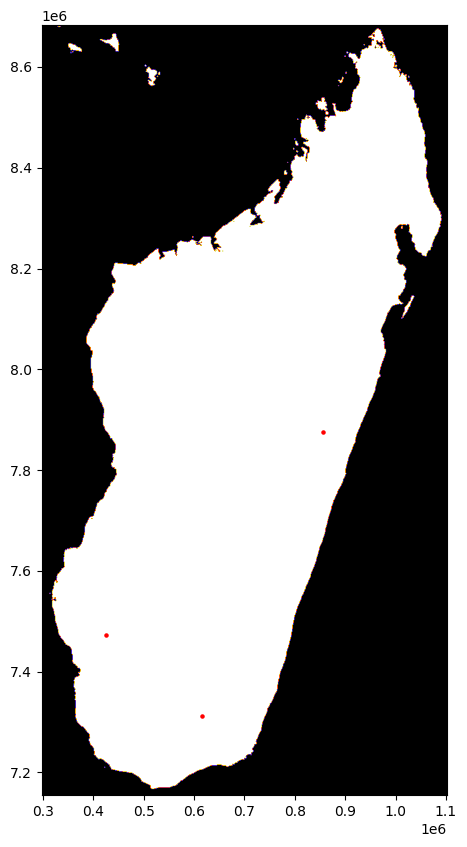

In [26]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import geopandas as gpd
from shapely.geometry import Point

# Open the raster file
dataset = rasterio.open(r"C:\Users\forc2101\OneDrive - USherbrooke\IFT809\IFT809\py_madaclim\madaclim_current.tif")

# Read the raster band (assuming band 1)
band1 = dataset.read(50)
#extent = [43, 51, -27, -11]
#ax2.set_extent(extent)
# Plot the raster
fig, ax = plt.subplots(figsize=(10, 10))
show(band1, transform=dataset.transform, ax=ax, cmap="CMRmap")#, extent=extent)
# Example geolocation points (longitude, latitude)
points = [(48.380066,-19.189873), (44.272222,-22.853611), (46.145833,-24.303611)]

# Convert points to GeoDataFrame
#gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([p[0] for p in points], [p[1] for p in points]))
gdf = gpd.GeoDataFrame(geometry=[Point(p) for p in points], crs='EPSG:4326')
gdf = gdf.to_crs(dataset.crs)
# Plot the points on the raster
gdf.plot(ax=ax, color='red', markersize=5)

plt.show() 

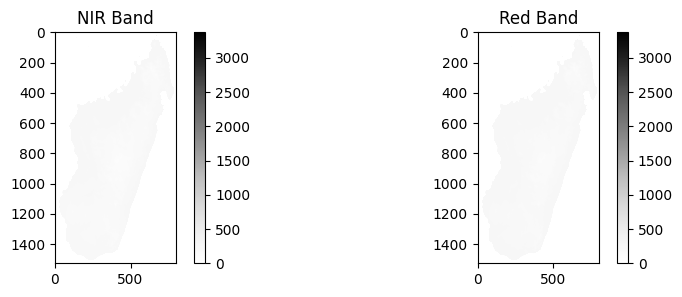

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3)) # 2 axes on a 1x2 grid
# note that we could also use indexing for our axes:
# fig, ax = plt.subplots(1, 2)
# ax1 = ax[0]

# find max reflectance to put them on the same colorbar scale
max_ref = np.amax([np.amax(image[3:,:]), np.amax(image[2:,:])])

# nir in first subplot
nir = ax1.imshow(image[3, :, :], cmap=plt.cm.Greys)
ax1.set_title("NIR Band")
nir.set_clim(vmin=0, vmax=max_ref)

fig.colorbar(nir, ax=ax1)

# Now red band in the second subplot
red = ax2.imshow(image[2, :, :], cmap=plt.cm.Greys)
ax2.set_title("Red Band")
red.set_clim(vmin=0, vmax=max_ref)
fig.colorbar(red, ax=ax2)

In [2]:
from rasterio.plot import reshape_as_raster, reshape_as_image

# Extract reference to SWIR1, NIR, and Red bands
index = np.array([4, 3, 2])
colors = image[index, :, :].astype(np.float64)

max_val = 5000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[0]):
    colors[b, :, :] = colors[b, :, :] * 1 / (max_val - min_val)

# rasters are in the format [bands, rows, cols] whereas images are typically [rows, cols, bands]
# and so our array needs to be reshaped
print(colors.shape)
colors_reshaped = reshape_as_image(colors)
print(colors_reshaped.shape)

NameError: name 'np' is not defined

In [43]:
np.seterr(divide='ignore', invalid='ignore')
bandNIR = image[3, :, :]
bandRed = image[2, :, :]

ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

In [1]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 

# Show the color image
axs[0].imshow(colors_reshaped)
axs[0].set_title('Color Image')

# Show NDVI
axs[1].imshow(ndvi, cmap='RdYlGn')
axs[1].set_title('NDVI')

NameError: name 'plt' is not defined

<Axes: >

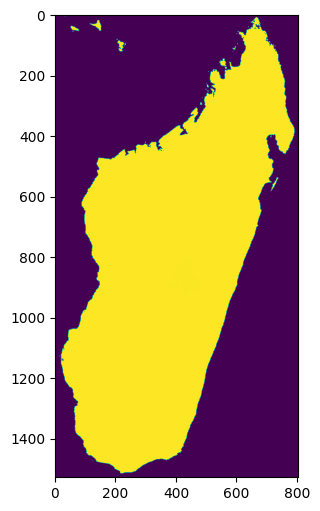

In [46]:
# this functions build on matplotlib and make them custom for rasterio
from rasterio.plot import show

fig, ax = plt.subplots(figsize=(6,6))

# display just band 4 (NIR)
show((dataset.read(4)), ax=ax)

In [ ]:
import rasterio

import numpy as np

# Open our raster dataset
dataset = rasterio.open(r"C:\Users\forc2101\OneDrive - USherbrooke\IFT809\IFT809\py_madaclim\madaclim_current.tif")

image = dataset.read()

Text(0.5, 1.0, 'RGB in matplotlib imshow')

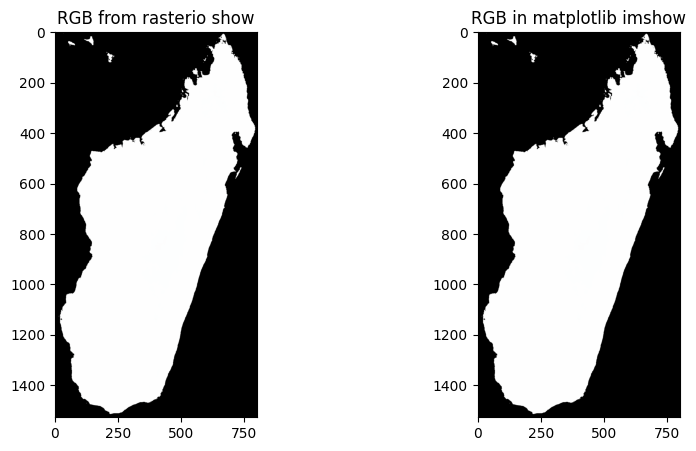

In [47]:
from rasterio.plot import adjust_band

rgb = image[0:3] # read in red, green, blue
rgb_norm = adjust_band(rgb) # normalize bands to range between 1.0 to 0.0
rgb_reshaped = reshape_as_image(rgb_norm) # reshape to [rows, cols, bands]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# the rasterio show function takes in [bands, rows, cols] so we don't need to reshape
show(rgb_norm, ax=axs[0])
axs[0].set_title("RGB from rasterio show")

# plot with normal matplotlib functions
axs[1].imshow(rgb_reshaped)
axs[1].set_title("RGB in matplotlib imshow")